# *Offline Handwritten Character Recognition*

### The purpose of this notebook is to build up an simple machine learning model for offline handwritten text recognition by using segmentation and classification. 

I borrowed initial source code here, and made further adjustment based on that. Initial-code: https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr

## Approach

* **Step1** :  Build a A-Z characters classifier using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

### Step 1: Build a A-Z characters classifier using a CNN architecture.

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

2023-12-17 16:55:46.613014: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
dir = "./handwritten-characters/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@","0","1","2","3","4","5","6","7","8","9"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    if os.path.isdir(sub_directory):
        for j in os.listdir(sub_directory):
            count+=1
            if count > 4000:
                break
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            train_data.append([img,i])
    else:
        print(f"Skipping non-directory: {sub_directory}")

Skipping non-directory: ./handwritten-characters/Train/.DS_Store


In [5]:
len(train_data)

100000

In [27]:
val_dir = "./handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    if os.path.isdir(sub_directory):
        for j in os.listdir(sub_directory):
            count+=1
            if count > 1000:
                break
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            val_data.append([img,i])
    else:
        print(f"Skipping non-directory: {sub_directory}")

In [28]:
len(val_data)

6651

In [29]:
random.shuffle(train_data)

random.shuffle(val_data)

In [31]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [32]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [33]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [34]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [35]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [36]:
print(train_X.shape,val_X.shape)

(100000, 32, 32, 1) (6651, 32, 32, 1)


In [37]:
print(train_Y.shape,val_Y.shape)

(100000, 25) (6651, 25)


#### Initial Model:

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [26]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [27]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 115s 26ms/step - loss: 0.6039 - accuracy: 0.8082 - val_loss: 0.3226 - val_accuracy: 0.8931
Epoch 2/50
4375/4375 [==============================] - 126s 29ms/step - loss: 0.3441 - accuracy: 0.8849 - val_loss: 0.2950 - val_accuracy: 0.9006
Epoch 3/50
4375/4375 [==============================] - 115s 26ms/step - loss: 0.3009 - accuracy: 0.8978 - val_loss: 0.3020 - val_accuracy: 0.8871
Epoch 4/50
4375/4375 [==============================] - 110s 25ms/step - loss: 0.2772 - accuracy: 0.9061 - val_loss: 0.2587 - val_accuracy: 0.9073
Epoch 5/50
4375/4375 [==============================] - 116s 26ms/step - loss: 0.2579 - accuracy: 0.9103 - val_loss: 0.2481 - val_accuracy: 0.9154
Epoch 6/50
4375/4375 [==============================] - 117s 27ms/step - loss: 0.2450 - accuracy: 0.9154 - val_loss: 0.2531 - val_accuracy: 0.9141
Epoch 7/50
4375/4375 [==============================] - 111s 25ms/step - loss: 0.2348 - accuracy: 0.9176 - val_loss: 0

## Model changes: 
*Batch Normalization* : Add Batch Normalization layers to normalize the inputs between layers, which can accelerate training and improve model convergence.

*Use Different Activation Functions*:
Try different activation functions for hidden layers, such as Leaky ReLU or Parametric ReLU, to introduce non-linearity.



In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU

model_batch = Sequential()

model_batch.add(Conv2D(32, (3, 3), padding="same", activation='elu', input_shape=(32, 32, 1)))
model_batch.add(BatchNormalization())  # Add Batch Normalization here
model_batch.add(MaxPooling2D(pool_size=(2, 2)))

model_batch.add(Conv2D(64, (3, 3), activation='elu'))
model_batch.add(BatchNormalization())  # Add Batch Normalization here
model_batch.add(MaxPooling2D(pool_size=(2, 2)))

model_batch.add(Conv2D(128, (3, 3), activation='elu'))
model_batch.add(BatchNormalization())  # Add Batch Normalization here
model_batch.add(MaxPooling2D(pool_size=(2, 2)))

model_batch.add(Dropout(0.25))

model_batch.add(Flatten())
model_batch.add(Dense(128, activation='elu'))
model_batch.add(BatchNormalization())  # Add Batch Normalization here
model_batch.add(Dropout(0.2))

model_batch.add(Dense(25, activation='softmax'))


In [45]:
model_batch.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])

In [46]:
history_batch = model_batch.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
3125/3125 [==============================] - 155s 48ms/step - loss: 0.4426 - accuracy: 0.8615 - val_loss: 0.3095 - val_accuracy: 0.8929
Epoch 2/50
3125/3125 [==============================] - 126s 40ms/step - loss: 0.2528 - accuracy: 0.9185 - val_loss: 0.2716 - val_accuracy: 0.9126
Epoch 3/50
3125/3125 [==============================] - 118s 38ms/step - loss: 0.2195 - accuracy: 0.9275 - val_loss: 0.2226 - val_accuracy: 0.9226
Epoch 4/50
3125/3125 [==============================] - 122s 39ms/step - loss: 0.1993 - accuracy: 0.9334 - val_loss: 0.2176 - val_accuracy: 0.9232
Epoch 5/50
3125/3125 [==============================] - 119s 38ms/step - loss: 0.1850 - accuracy: 0.9381 - val_loss: 0.1963 - val_accuracy: 0.9353
Epoch 6/50
3125/3125 [==============================] - 123s 39ms/step - loss: 0.1721 - accuracy: 0.9406 - val_loss: 0.2246 - val_accuracy: 0.9182
Epoch 7/50
3125/3125 [==============================] - 120s 38ms/step - loss: 0.1636 - accuracy: 0.9431 - val_loss: 0

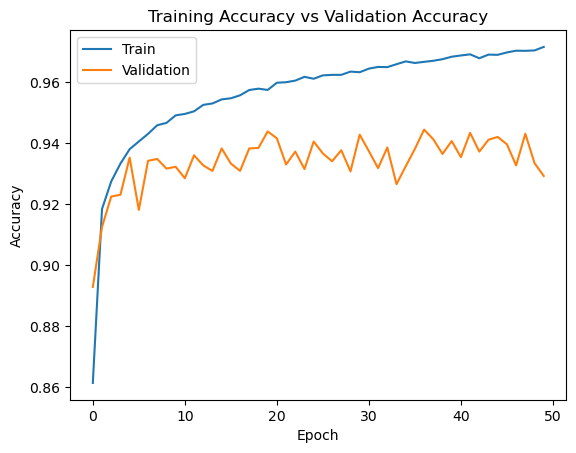

In [57]:
plt.plot(history_batch.history['accuracy'])
plt.plot(history_batch.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

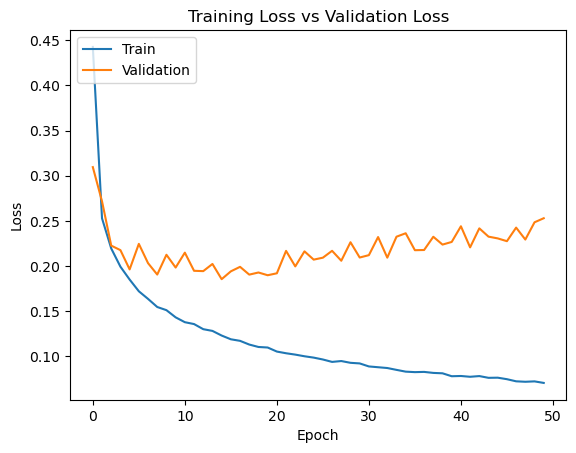

In [58]:
plt.plot(history_batch.history['loss'])
plt.plot(history_batch.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [50]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [6]:
def get_letters(img, model):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image


In [63]:
def get_word(letter):
    word = "".join(letter)
    return word

## Download the model and labelbinarizer 
credit: ChatGPT

In [70]:
joblib.dump(model_batch, 'model_trail_3.pkl')
joblib.dump(LB, 'label_binarizer.joblib')